# RED WINE QUALITY PREDICTION   | PHASE-1 | PROJECT -1

FlipRoboTechnology  | Batch - DS2301 | Submitted By :- Neha Vibhor Mittal

### DATASET INFORMATION-

 --This dataset is available on : https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This Dataset includes over 1599 records and 12 attributes.

####  PROBLEM IDENTIFICATION -

In this dataset, the classes are ordered and not well-balanced (e.g. there are many more normal wines than excellent or poor ones).What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

This dataset can be viewed as classification task .

- The aim is to use exploratory data analysis (EDA) to determine which physiochemical properties make a wine 'good' and to predict alcohol levels in wine with a model that's as accurate as possible. 
- Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

- This project will have the following structure:
1. Sourcing and loading
- Import relevant libraries
- Load the data
- Exploring the data
- Choosing a dependent variable

2. Cleaning, transforming, and visualizing
- Visualizing Data
- Correlations
- Feature scaling

3. Modeling
- Using Train/Test split building Models
- Hyperparameter Tunning
- Plotting  AUC_ROC CURVE
- Cross validation

4. Evaluating and concluding
- Which model was fits best?
- Saving the model


#### ATTRIBUTE INFORMATION INCLUDES-

Input variables (based on physicochemical tests):

- 1 - fixed acidity-indicates the amount of tartaric acid in wine as most acids involved with wine or fixed or nonvolatile.

- 2 - volatile acidity-the amount of acetic acid in wine, which at too high levels can lead to an unpleasant, vinegar taste.

- 3 - citric acid-found in small quantities, citric acid can add 'freshness' and flavor to wines

- 4 - residual sugar-the amount of sugar remaining after the fermentation stops, it's rare to find wines with less than 1 gram/liter.

- 5 - chlorides-the amount of salt in the wine.

- 6 - free sulfur dioxide-exhibit both germicidal and antioxidant properties.

- 7 - total sulfur dioxide-is a measure of both the free and bound forms of sulfur dioxide.

- 8 - density-the free form of Sulphurdioxide exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents.

- 9 - pH- describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4.

- 10 - sulphates- describes how acidic or basic,is a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4.

- 11 - alcohol- indicates the alcohol content in the wine.

Label/Output/Target variable (based on sensory data):

- 12 - quality -Quality of a wine based on a scores between 0 - 10.


#### TOOLS USED :-
The following tools are going to be used for data analysis-
- Pandas
- Numpy
- Matplotlib
- Seaborn
- scipy.stats
- Scikit-learn

#### 1.Sourcing and loading

#### IMPORTING NECESSARY LIBRARIES-

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as stl
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

#### LOAD THE DATASET -

In [3]:
wine = pd.read_csv("winequality-red.csv")
wine.head()   # head()method will show the top 5 rows and columns 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- This dataset contains categorical data .Here,Quality is our target variable and contains categorical information.

In [4]:
wine.tail()  #tail() Returns the last 5 rows and columns.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


#### DATA EXPLORATION-

In [5]:
wine.shape  # to check the shape of the dataset

(1599, 12)

- This shows that there are 1599 rows and 12 columns.

In [6]:
wine.columns  #to see the columns names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

- These are the names of the 12 columns present in a dataset.

In [7]:
wine.info()  # to check the information present in a datset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### KEY INFORMATION FROM ABOVE DATASET-
- There are total 1599 entries(rows) with 12 columns with integer64 and float64 datatypes of variables.
- Only 'Quality' remains in int64 while the rest of the data is in float64.
- The second column give us an idea about how big the dataset and how many non-null values are there for each field.
- The total memory usage is 150kb.

In [8]:
wine.describe()  # to check the Statistical summary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### KEY OBSERVATION FROM ABOVE STATISTICAL SUMMARY -
- All the columns has same count as 1599 which means there is no null values in the dataset.
- The Mean is greater than the Median (50th percentile ) in all the columns, this shows that the data is right sided skewed.
- There is a large difference between the 75% (quantile 3) and max values in 'residual sugar','free sulfurdioxide'  and 'total sulfur dioxide',which indicates there is skewness/outliers in the data.
- The std data in 'free sulfurdioxide'  and 'total sulfur dioxide' are highly spreaded that means the possibility of outliers are more.
- The 3 and 4 observations suggest that there are extreme outlier present in the three columns .

In [9]:
wine.dtypes  # to check the datatypes of all variables.

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

- As there is integer64 and float64 datatypes of variables.Only Quality remains in int64 while the rest of the data is in float64.

In [10]:
wine.nunique()    #nunique() method returns the number of unique values for each column

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [11]:
#checking the value count for each columns

for col in wine.columns:   
    print('-' * 50 + col + '-' * 50 , end=' - ')
    display(wine[col].value_counts().head(10))

--------------------------------------------------fixed acidity-------------------------------------------------- - 

7.2    67
7.1    57
7.8    53
7.5    52
7.0    50
7.7    49
6.8    46
7.6    46
8.2    45
7.4    44
Name: fixed acidity, dtype: int64

--------------------------------------------------volatile acidity-------------------------------------------------- - 

0.60    47
0.50    46
0.43    43
0.59    39
0.36    38
0.58    38
0.40    37
0.38    35
0.49    35
0.39    35
Name: volatile acidity, dtype: int64

--------------------------------------------------citric acid-------------------------------------------------- - 

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
0.10     35
0.08     33
0.21     33
0.01     33
0.32     32
Name: citric acid, dtype: int64

--------------------------------------------------residual sugar-------------------------------------------------- - 

2.0    156
2.2    131
1.8    129
2.1    128
1.9    117
2.3    109
2.4     86
2.5     84
2.6     79
1.7     76
Name: residual sugar, dtype: int64

--------------------------------------------------chlorides-------------------------------------------------- - 

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
0.071    47
0.077    47
0.082    46
0.075    45
0.079    43
Name: chlorides, dtype: int64

--------------------------------------------------free sulfur dioxide-------------------------------------------------- - 

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
Name: free sulfur dioxide, dtype: int64

--------------------------------------------------total sulfur dioxide-------------------------------------------------- - 

28.0    43
24.0    36
15.0    35
18.0    35
23.0    34
14.0    33
20.0    33
31.0    32
38.0    31
27.0    30
Name: total sulfur dioxide, dtype: int64

--------------------------------------------------density-------------------------------------------------- - 

0.9972    36
0.9968    35
0.9976    35
0.9980    29
0.9962    28
0.9978    26
0.9964    25
0.9994    24
0.9970    24
0.9982    23
Name: density, dtype: int64

--------------------------------------------------pH-------------------------------------------------- - 

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
3.29    46
3.32    45
3.34    43
3.28    42
3.20    39
Name: pH, dtype: int64

--------------------------------------------------sulphates-------------------------------------------------- - 

0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
0.57    55
0.53    51
0.59    51
0.55    50
0.63    48
Name: sulphates, dtype: int64

--------------------------------------------------alcohol-------------------------------------------------- - 

9.5     139
9.4     103
9.8      78
9.2      72
10.0     67
10.5     67
9.3      59
11.0     59
9.6      59
9.7      54
Name: alcohol, dtype: int64

--------------------------------------------------quality-------------------------------------------------- - 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
wine.isnull().sum()  #Checking for NULL values if any in the data frame

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- There is no null values in this dataset.

#### DATA VISUALIZATION

<AxesSubplot:>

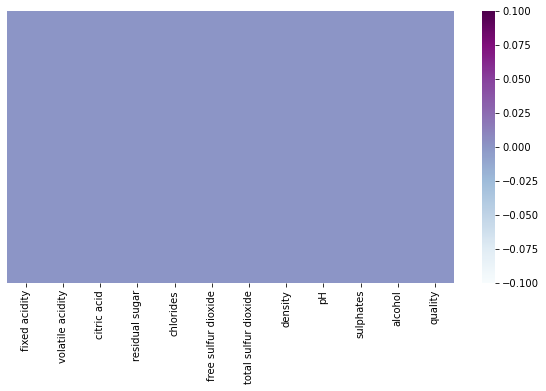

In [13]:
#Checking for null values using heatmap.

plt.figure(figsize=(10,5))
sns.heatmap(wine.isnull(),yticklabels=False,cbar=True,cmap="BuPu")

- No significant Null values seen using heatmap.

#### Choosing the dependent /Taget variable by Analyzing the Target variable:-
  - As we need a variable whose values we need to predict. 'Quality' seems to be as good a candidate and has Catergorical type of Data.

In [14]:
wine.quality.unique()  #to find unique elements in columns

array([5, 6, 7, 4, 8, 3], dtype=int64)

- Target variable/Dependent variable is discrete and categorical in nature.
- "Quality" score scale ranges from 1 to 10; where 1 being poor and 10 being the best quality wine.
- Score of '1','2' and '10' quality ratings are not given by any obseravtion.Only scores are obtained between '3' to '9'.

In [15]:
wine.quality.value_counts() # to check the value count of quality 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- There are 6 different qualities of Wine are present in the target column where each category  is not well-balanced.
- Classes '5' and '6' carry the most values while '3','4','7','8' carry minimal values.

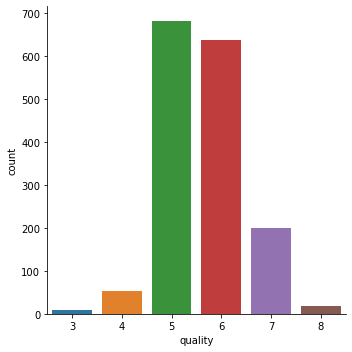

In [16]:
# Visualisng the data using catplot.

sns.catplot(x='quality',data = wine,kind = 'count')

- The number of ratings for wine quality '5' and '6' are more than 10 times of that of '3' , '4' and '8'
- With seaborn.catplot,we can find that '5' and '6' scores shows medium quality of wine are present in majority of counts while '3','4','7','8' carry minimal values,thereby,we can see slight imbalance in data.
- Score of '1','2' and '10' quality ratings are not given by any obseravtion.

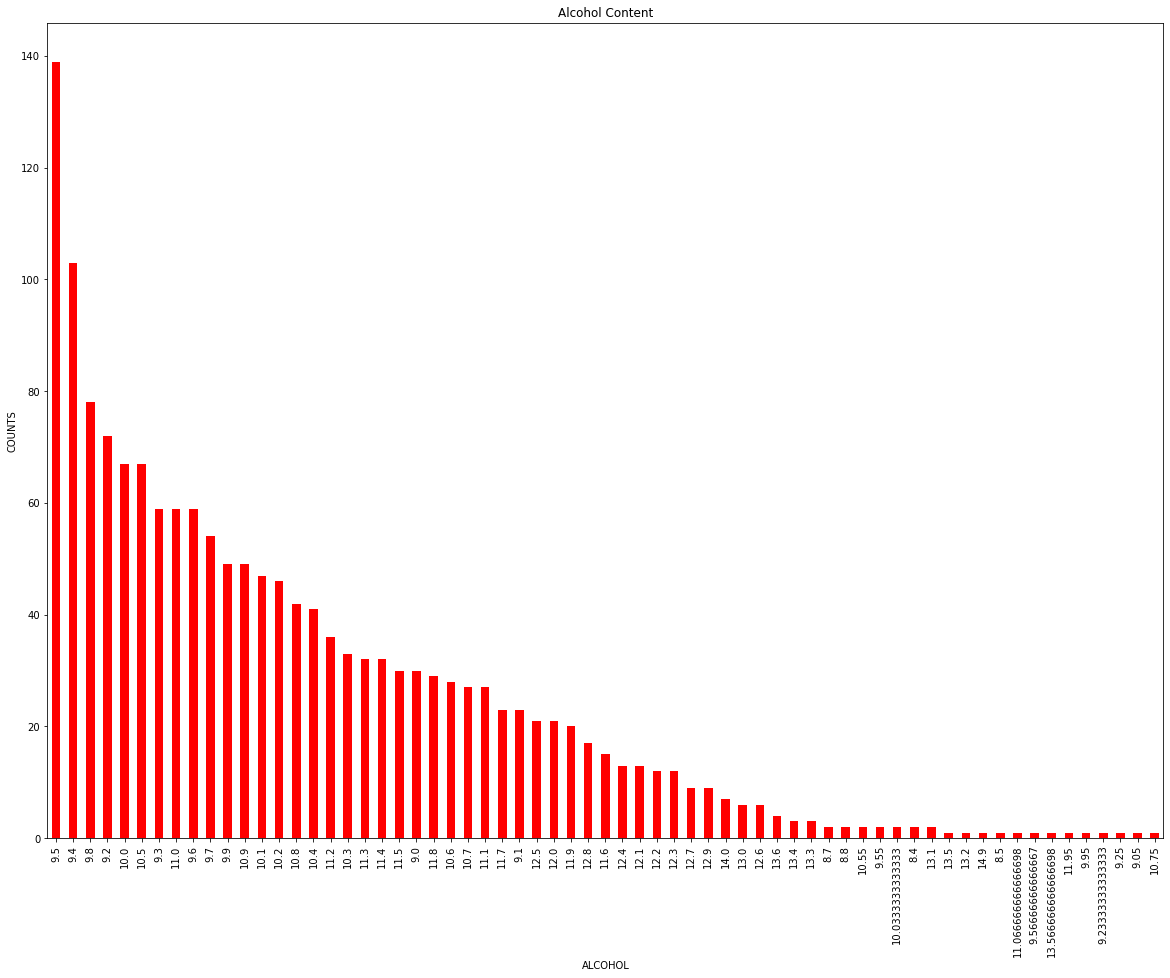

In [17]:
 # Checking the alcohol content in the wine.

plt.figure(figsize = (20, 15))      
ax = wine["alcohol"].value_counts().plot(kind = 'bar',color = "red")

plt.xticks(rotation=90)
plt.title("Alcohol Content")
plt.xlabel('ALCOHOL')
plt.ylabel('COUNTS')
plt.show()

#### Key observation-
- The maximum alcohol content(9.5-9.4) was found in almost majority of wine.

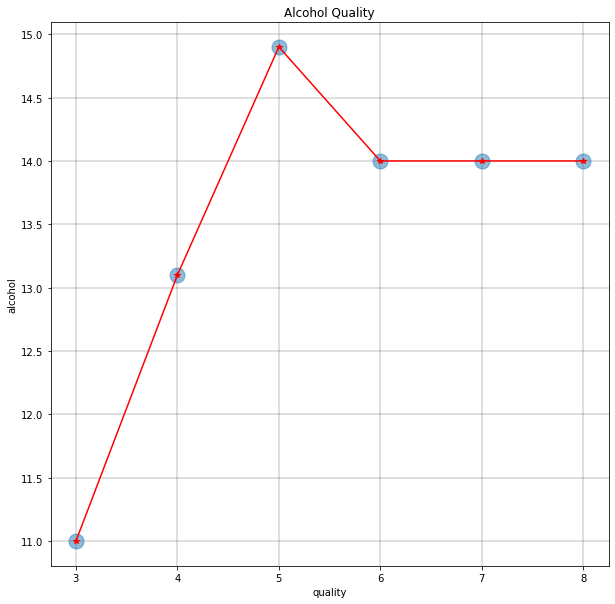

In [18]:
# Checking the Alcohol Quality in the wine.

plt.figure(figsize =(10,10))
plt.title('Alcohol Quality') 
Dis = wine.groupby(['quality'])['alcohol'].max()

plt.grid(color = 'black', linewidth = 0.25)
plt.plot(Dis,'.', alpha = 0.5, markersize = 15,marker = 'o')
plt.plot(Dis, color = 'red',marker ='*')
plt.xlabel("quality")
plt.ylabel("alcohol")

plt.show()

- Using Grouby() with aggregate function (max) to check the maximum alcohol quality in wine .
- The quality of alcohol was maximum at 5 and 6 score.

#### Using various other methods to visualize the graphs and check the relationship between them and the Target Variable "Quality".

<function matplotlib.pyplot.show(close=None, block=None)>

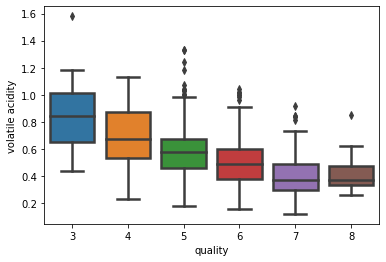

<Figure size 1440x720 with 0 Axes>

In [19]:
#"Quality" and "Volatile acidity"

sns.boxplot(x='quality',y='volatile acidity',data=wine, linewidth=2.5)
plt.figure(figsize=(20,10))
plt.show


- As the "Volatile acidity" increases the "Quality" decreases . Hence,there is a negative relationship between "Quality" and "Volatile acidity ".

<function matplotlib.pyplot.show(close=None, block=None)>

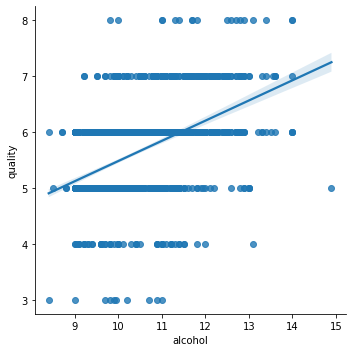

<Figure size 1440x720 with 0 Axes>

In [20]:
#"Alcohol" and "Quality"

sns.lmplot(x='alcohol',y='quality',data=wine)
plt.figure(figsize=(20,10))
plt.show

 - As the "Quality" increases the "Alcohol" also increases . Hence,there is a positive relationship between "Quality" and "Alcohol" .

<function matplotlib.pyplot.show(close=None, block=None)>

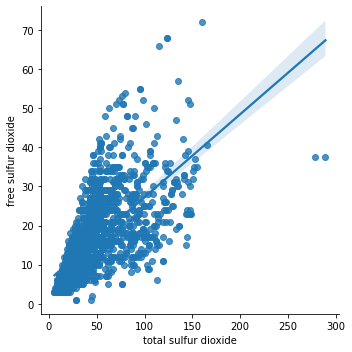

<Figure size 1440x720 with 0 Axes>

In [21]:
#"Total sulfur dioxide" and "Free sulfur dioxide"

sns.lmplot(x='total sulfur dioxide',y='free sulfur dioxide',data=wine)
plt.figure(figsize=(20,10))
plt.show

- There is a positive trend in both the attributes showing positive relationship between them.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

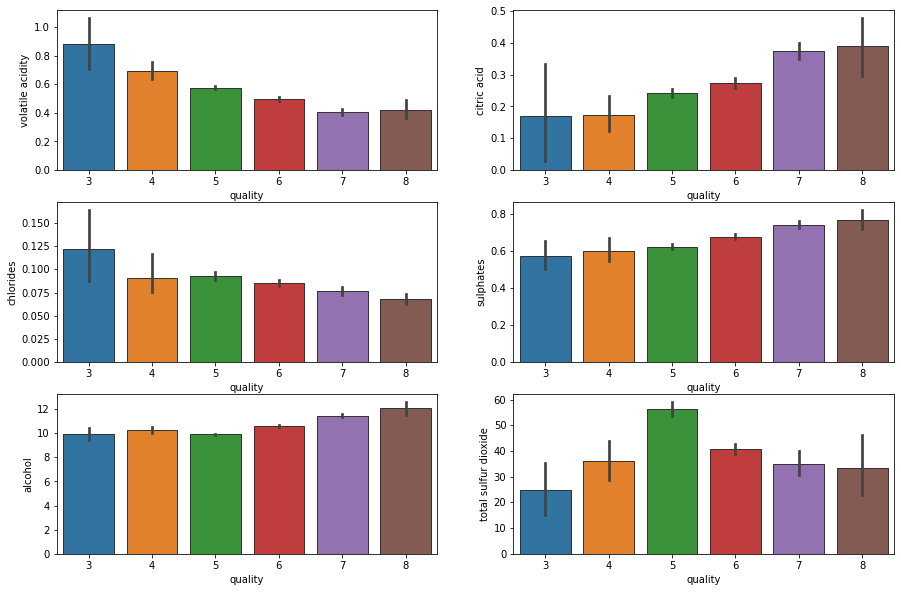

In [22]:
# Checking the relation of Target variable with each independent variable using barplot .

fig,axes = plt.subplots(3,2, figsize=(15,10))
sns.barplot(x='quality', y='volatile acidity', data=wine,ax=axes[0][0],edgecolor='.2')
sns.barplot(x='quality', y='citric acid', data=wine,ax=axes[0][1],edgecolor='.2')
sns.barplot(x='quality', y='chlorides', data=wine, ax=axes[1][0],edgecolor='.2')
sns.barplot(x='quality', y='sulphates', data=wine, ax=axes[1][1],edgecolor='.2')
sns.barplot(x='quality', y='alcohol', data=wine, ax=axes[2][0],edgecolor='.2')
sns.barplot(x='quality', y='total sulfur dioxide', data=wine,edgecolor='.2')

#### MAIN INFERENCE FROM THE ABOVE GRAPHS- 

- 'QUALITY' increases as 'Volatile Acidity' decreases which means wine 'Quality' and 'Volatile Acidity' are inversely propotional to each other.

- 'QUALITY' increases as 'Citric Acid' increases which indicates that 'Citric acid' is directly proportional to 'Quality'.
    
- 'QUALITY' increases as 'Chlorides' decreases(negative relationship with to each other).

- 'QUALITY' increases as 'Sulphates' quantity increases shows positive relationship with each other.

- 'QUALITY' increases as 'Alcohol' quantity increases shows positive relationship.

- 'Total sulfur dioxide' was highest in '5' and'6' quality rating wines while '3' been the lowest .

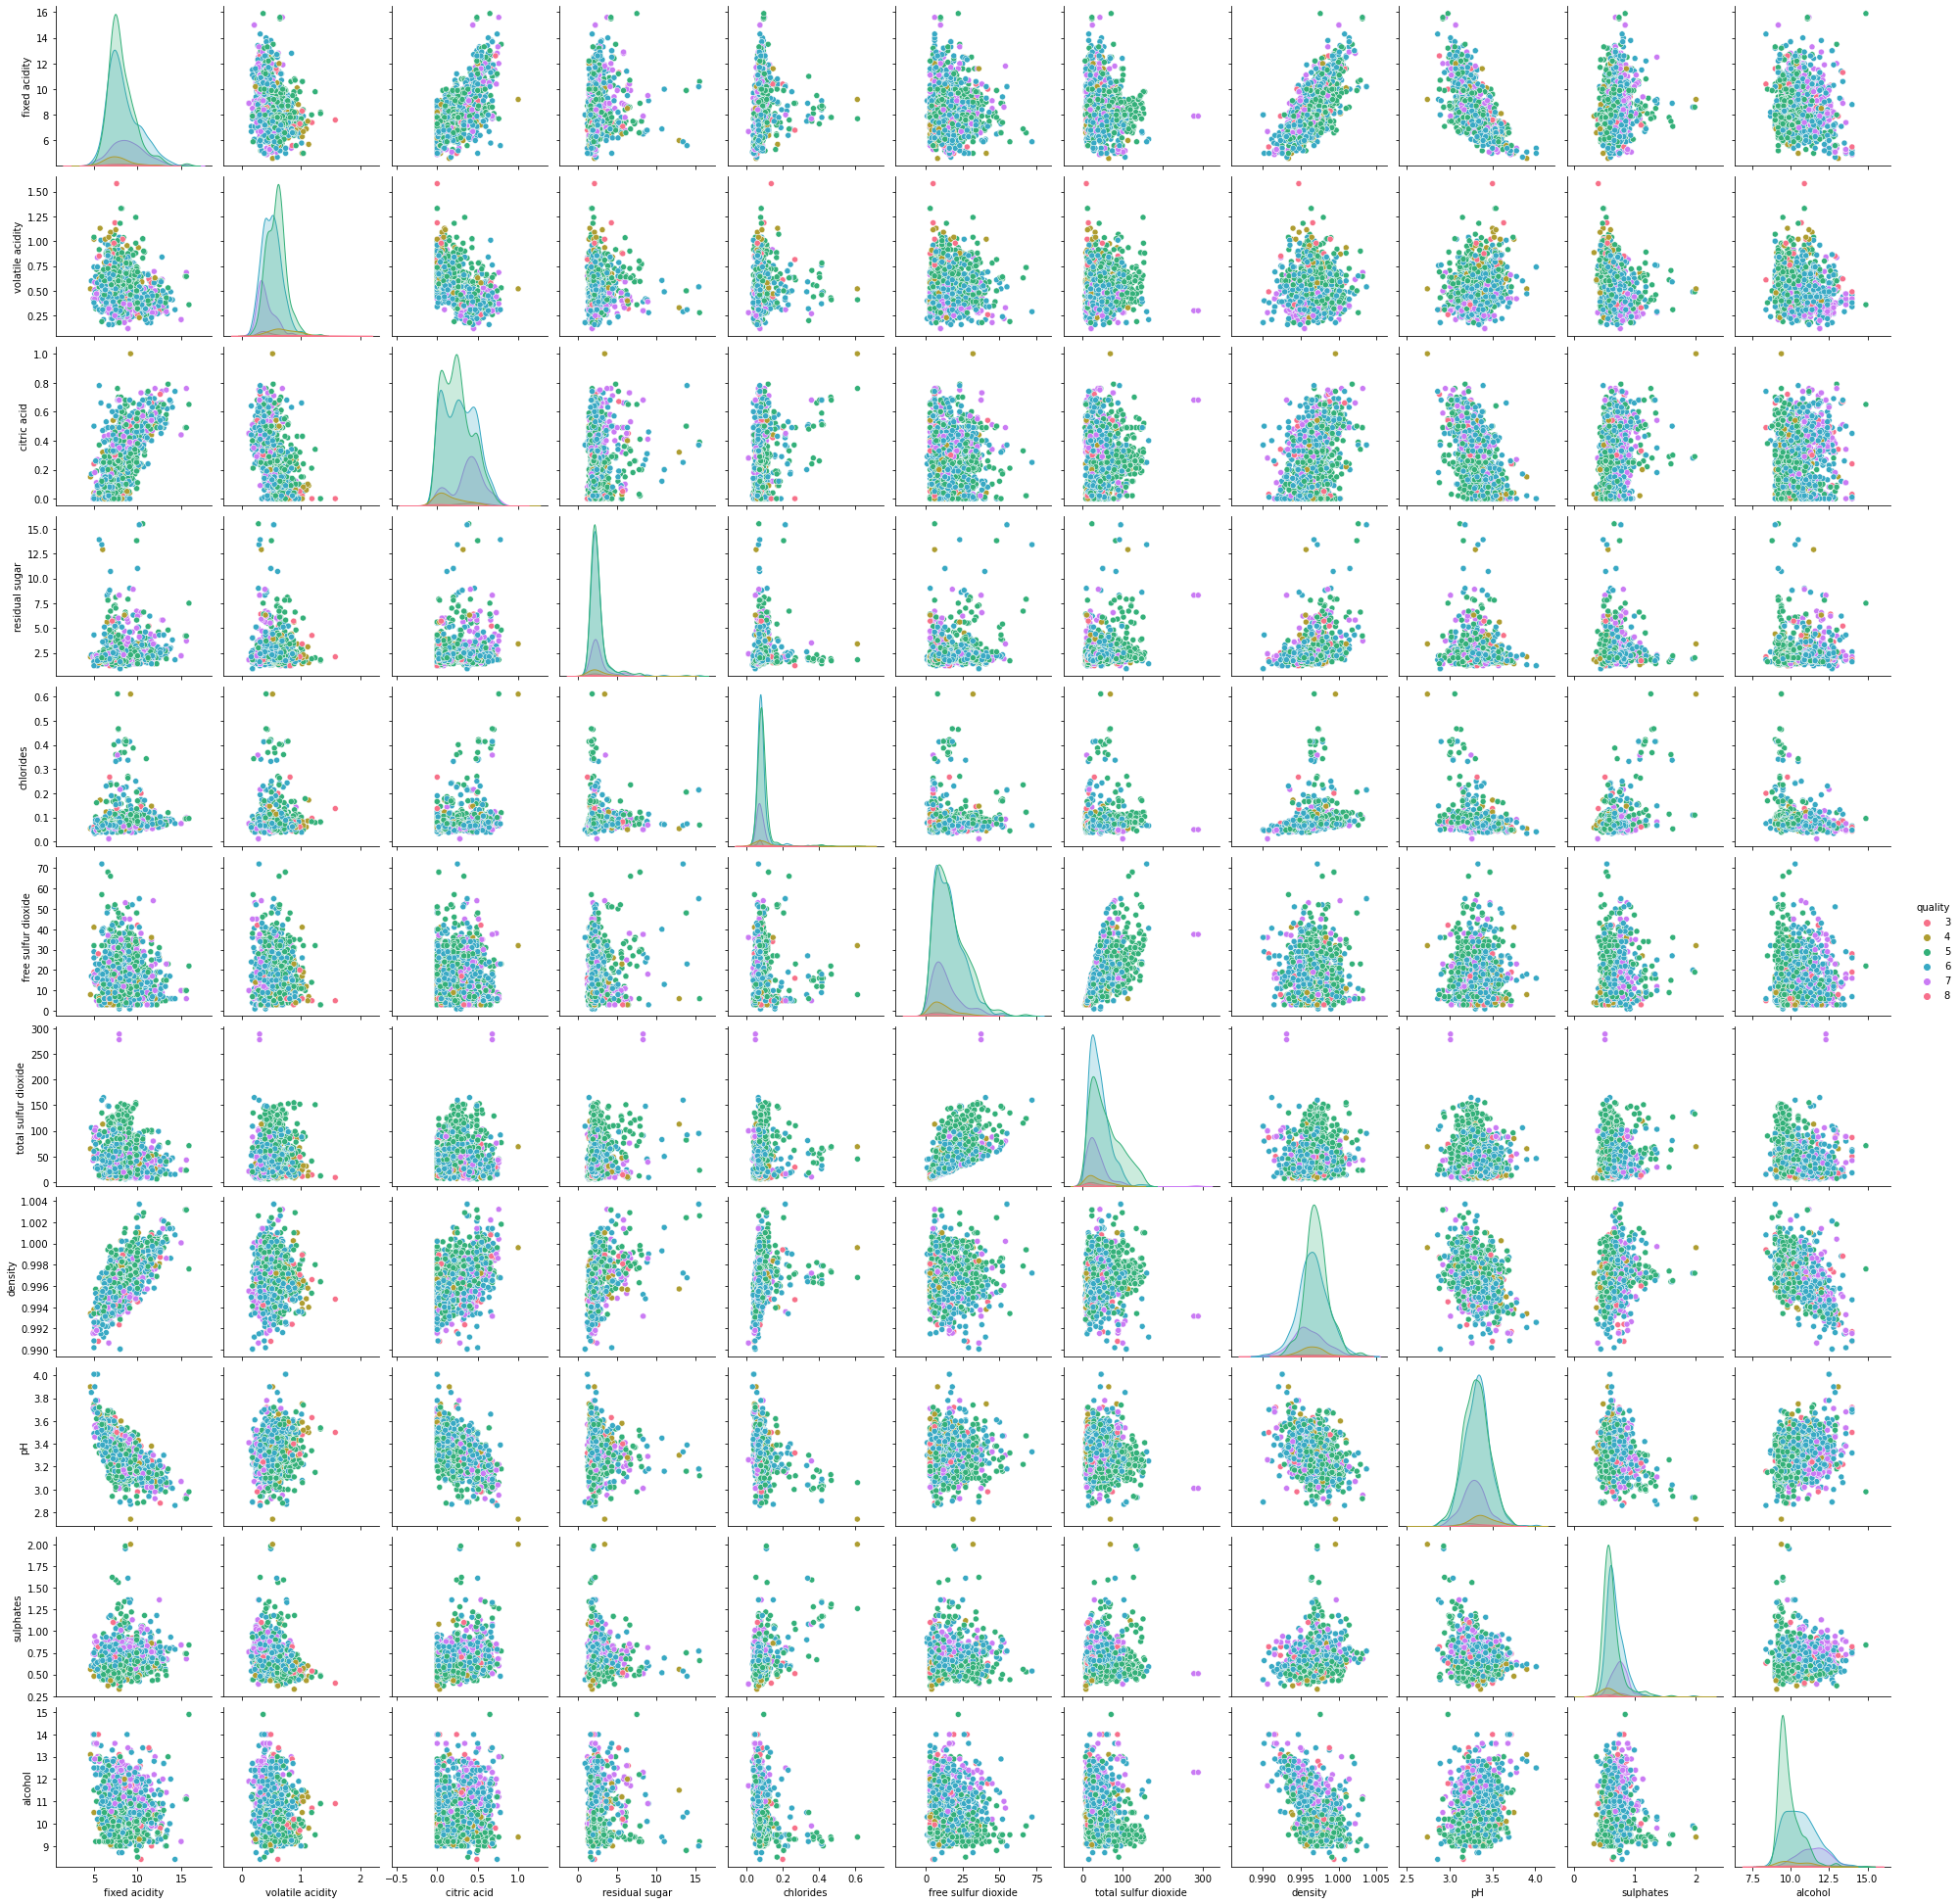

In [23]:
#Calculating the pairplot for wine dataset

sns.pairplot(wine, hue='quality', palette='husl')  

### CORRELATION MATRIX

In [24]:
winecor= wine.corr() # to check the correlation of the dataset.
winecor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<function matplotlib.pyplot.show(close=None, block=None)>

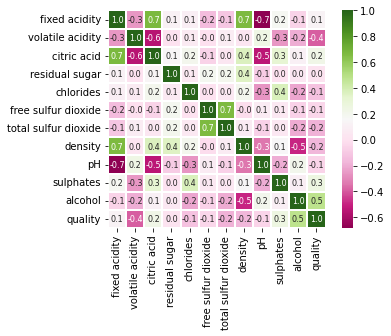

<Figure size 1440x720 with 0 Axes>

In [25]:
#constructing a heatmap to understand the correlation between the columns 

sns.heatmap(wine.corr(), cbar=True, linewidth=0.3, cmap="PiYG", annot=True, fmt='.1f', annot_kws={'size':8}, square=True)
plt.figure(figsize=(20,10))  
plt.show

#### Key Observations:-
    -  Darker shades are highly correlated to each other.
    - 'Alcohol' and 'Quality' of wine are positively correlated to each other.
    -  Whereas, 'Alcohol' is negatively correlated with 'Density' with -0.5(dark maroon shade).
    - 'Volatile acidity'and 'Quality' of wine are negatively correlated to each other.
    - 'Total sulfur dioxide'is relatively correlated with 'free sulfur di oxide', 'Fixed acidity' with 'Citric acid' and 'Density'.

#### CHECKING AND REMOVING OUTLIERS AND SKEWNESS


In [26]:
wine.columns  # rechecking the columns names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

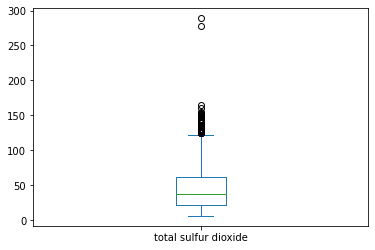

In [27]:
wine['total sulfur dioxide'].plot.box()  # Using box plot analysing outliers one by one

- As we see there is large number of outliers presnt in "Total Sulfur dioxide"

#### Using boxplot to detect the outliers of all the columns in the dataset.

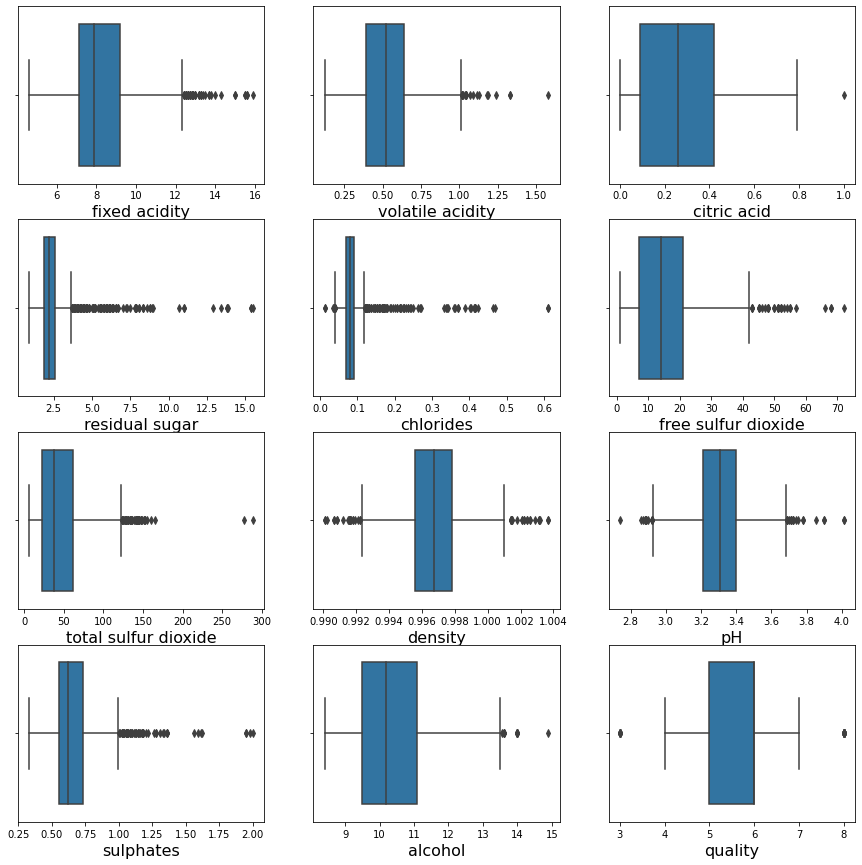

In [28]:
# Detecting outliers using boxplot.

plt.figure(figsize=(15,15),facecolor='white')
num = 1

for col in wine:
    if num <= 12:
        ax = plt.subplot(4,3,num)
        sns.boxplot(wine[col])
        plt.xlabel(col,fontsize=16)
    num += 1
plt.show()

#### key observations:
   - Total 12 columns are present.
   - As we can see ,there are outliers present in almost all columns but majorly in 'Total sulfur dioxide','Free sulfur dioxide','residual sugar'and 'chlorides'.
   - Some features are having outliers in both ends but no feature is without outlier.

#### ZSCORE METHOD

In [29]:
# Removing outlier using Z-Score Method.

from scipy.stats import zscore

In [30]:
z=np.abs(zscore(wine))
z
# abs(absolute function) will make all the negative data as a positive data.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [31]:
# clean data without outliers

wine_data=wine[(z<3).all(axis=1)]   
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [32]:
# checking the statistical summary of clean data 

data=wine_data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


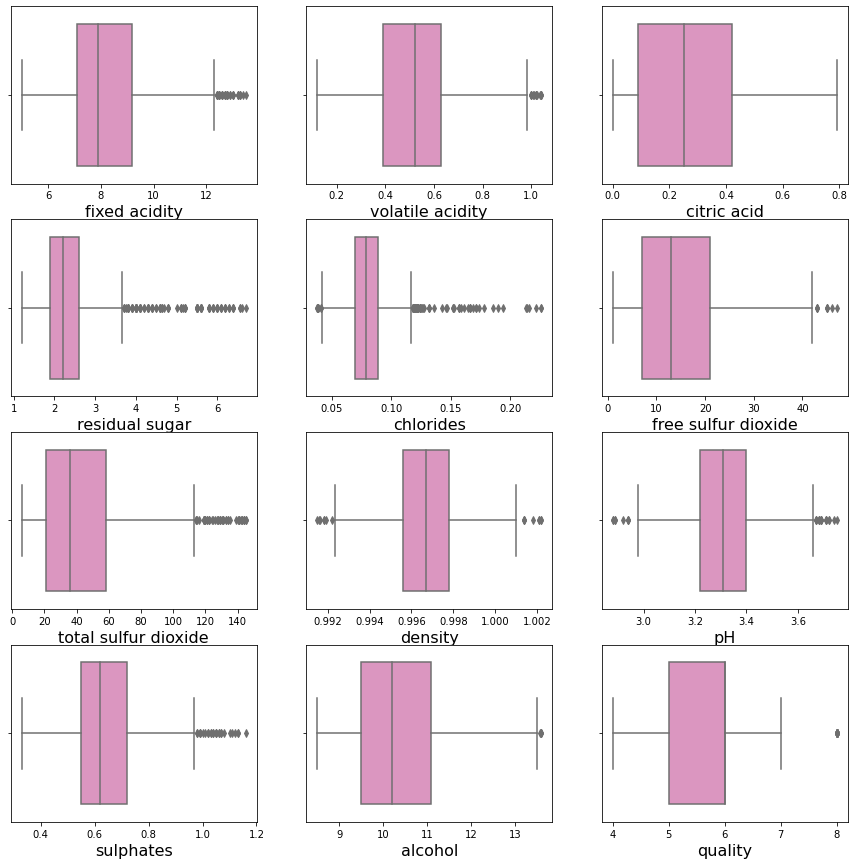

In [33]:
# Rechecking outliers using boxplot of clean data .

plt.figure(figsize=(15,15),facecolor='white')
num = 1

for col in wine_data:
    if num <= 12:
        ax = plt.subplot(4,3,num)
        sns.boxplot(wine_data[col],palette="Set2_r")
        plt.xlabel(col,fontsize=16)
    num += 1
plt.show()

In [34]:
print("Data Loss Percentage :",((wine.shape[0]-wine_data.shape[0])/wine.shape[0])*100)  # data loss should be less than 10 %.

Data Loss Percentage : 9.255784865540964


#### key observations -
- Outliers have been reduced to some extent.
- About 148 rows has been removed with much cleaner data.

In [35]:
wine.shape  #Original data

(1599, 12)

In [36]:
wine_data.shape  # clean data

(1451, 12)

### USING IQR METHOD

In [37]:
Q1=wine.quantile(0.25)
Q3=wine.quantile(0.75)

IQR=Q3-Q1
dwine = wine[~((wine < (Q1 - 1.5 * IQR)) | (wine > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dwine.shape)

(1179, 12)


In [38]:
print("Data Loss Percentage :",((wine.shape[0]-dwine.shape[0])/wine.shape[0])*100)

Data Loss Percentage : 26.26641651031895


- So after removing outliers with the help of IQR method ,we can notice there is huge data loss.Thereby,we can considering using zscore.

#### Handling Skewness

In [39]:
wine_data.skew()   # checking for skewness 

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

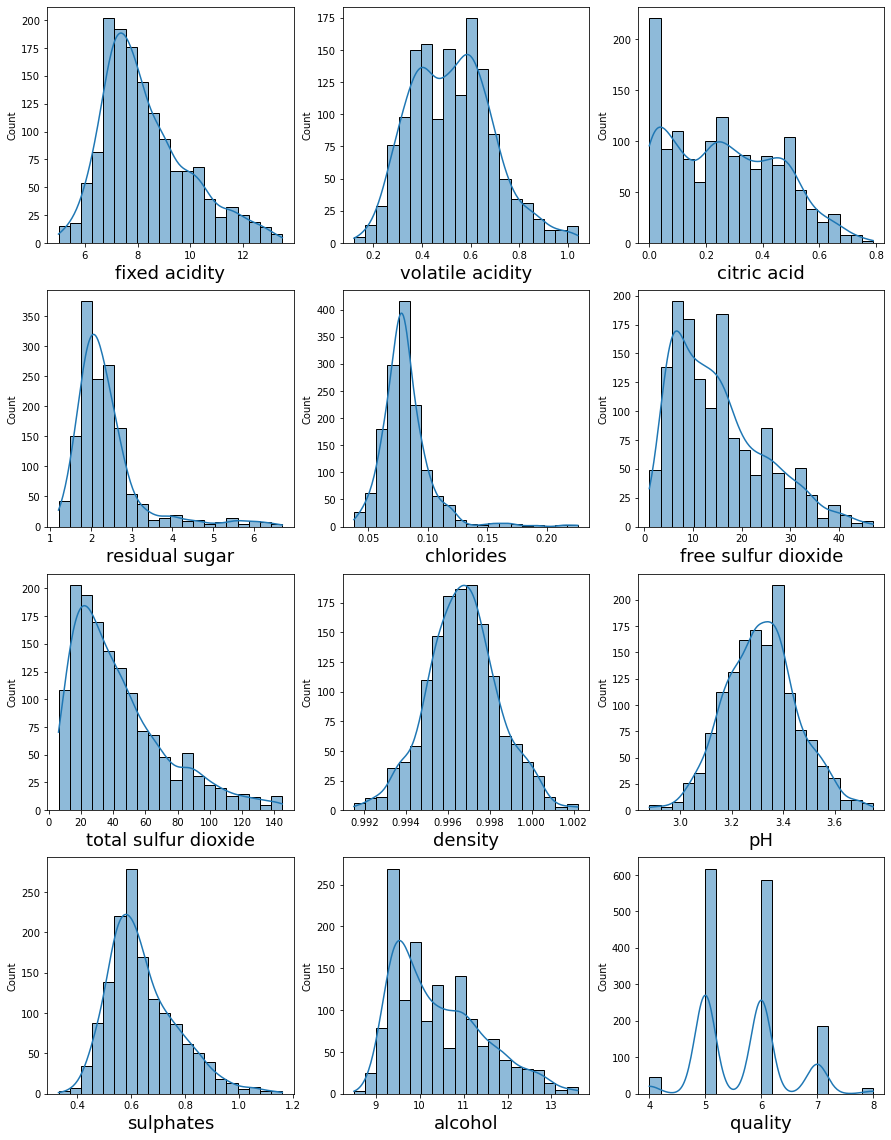

In [40]:
plt.figure(figsize=(15,20),facecolor ='white', edgecolor = 'black')
sknum = 1 

for i in wine_data:
    if sknum <= 12:
        ax=plt.subplot(4,3,sknum)
        sns.histplot(wine_data[i], kde=True, bins=20)
        plt.xlabel(i, fontsize = 18)
    sknum += 1
    
plt.show()

#### key observations-
- Some features are normally distributed such as 'density'and 'pH' but there are more or less skewness in every Independent variables i.e 'Fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates' and 'alcohol' columns are having skewness.
- The target variable 'quality' also shows some skewness. 

In [41]:
#checking the Distribution of data.

data_variable = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]

target = wine['quality']

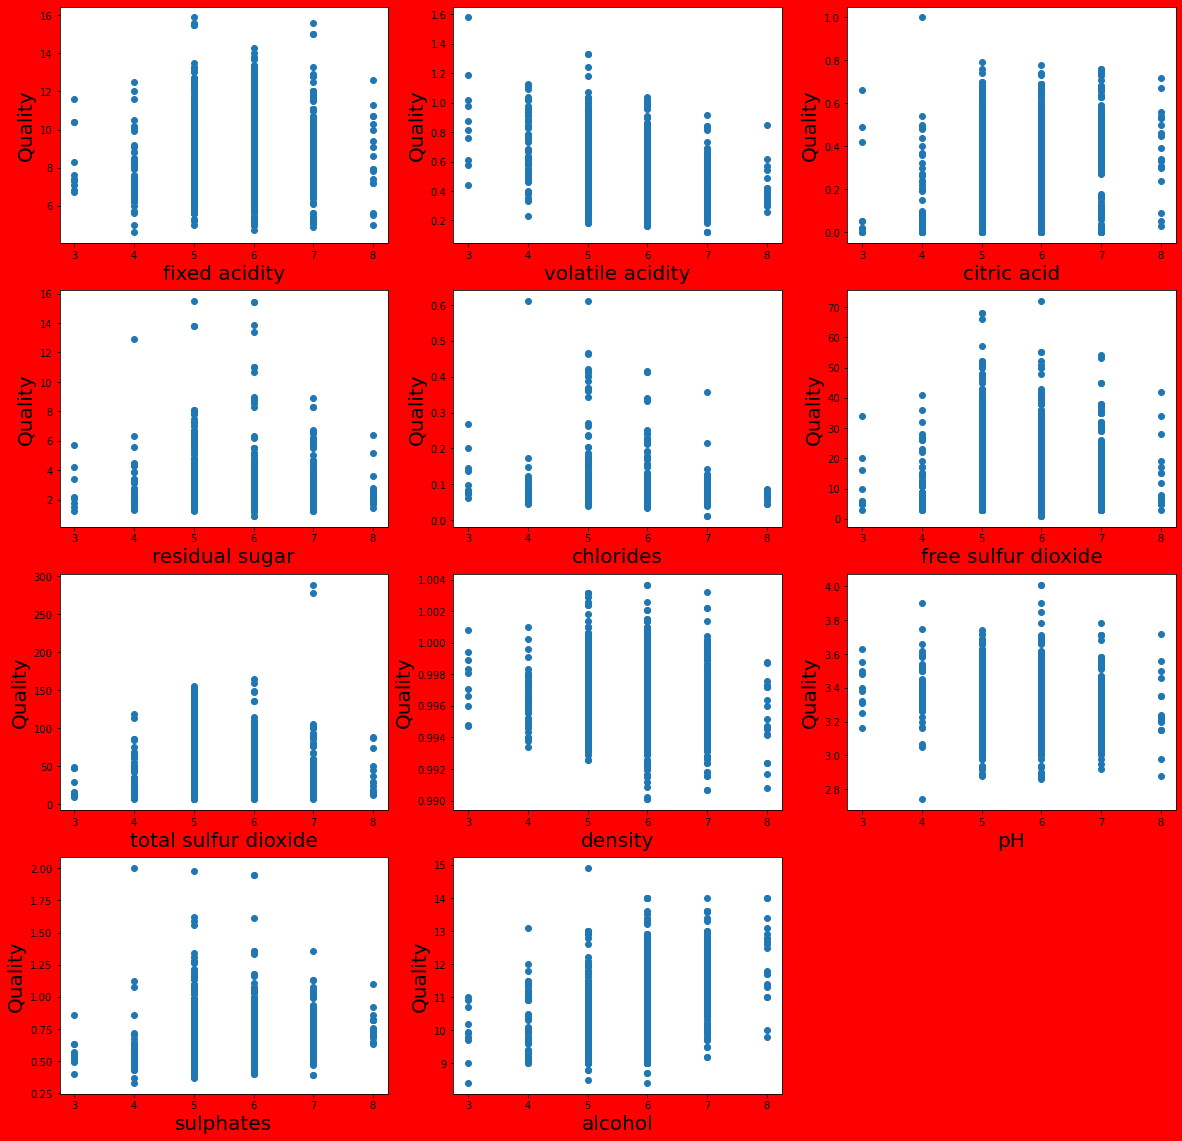

In [42]:
# Checking the relation of Target variable with each independent variable using Scatterplot.

plt.figure(figsize=(20,20),facecolor='red')
x=1

for column in data_variable:
    if x <= 12:
        ax= plt.subplot(4,3,x)
        plt.scatter(target,data_variable[column])
        
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Quality',fontsize=20)
    x +=1  
    
plt.show()

#### To determine which quality rating make a wine 'good'? 
- score of '7' or higher are considered as 'good/1' quality wine while less than '7' are considered 'poor/0' quality wine.

In [43]:
# importing sklearn.Preprocessing libraries-

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [44]:
bins=(2, 6, 8)
group_names=['Poor','Good']

wine_data['quality']=pd.cut(wine_data['quality'], labels =group_names,bins=bins)

In [45]:
#assigning labelencoder to our target variable

wine_quality = LabelEncoder()

In [46]:
# Poor is 0 and Good is 1 :

wine_data['quality'] = wine_quality.fit_transform(wine_data['quality'])


In [47]:
#dividing the target variable into 2 different categories:-
# 1=good quality
# 0=poor quality

wine_data['quality'].value_counts()


1    1250
0     201
Name: quality, dtype: int64

- As this is imbalance data, we need to first balance it.

<AxesSubplot:xlabel='quality', ylabel='count'>

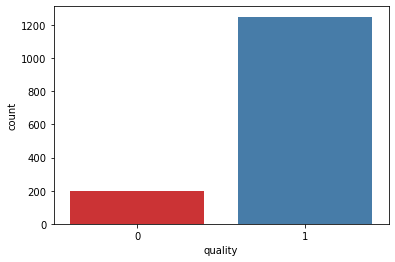

In [48]:
#Visualizing the same count using countplot.

sns.countplot(wine_data['quality'],palette='Set1')

In [49]:
#Dividing the data into x(data) and y variable(targets)-

x=wine_data.drop(columns=['quality'])
y=wine_data['quality']

In [50]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [51]:
y.value_counts()  #Target variable" quality" total counts.

1    1250
0     201
Name: quality, dtype: int64

In [52]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1451, dtype: int32

- To balance the target variable by using SMOTE. And we are going to upscale the poor quality category(0) as it is very less.

In [53]:
# installing imblearn 
!pip install imblearn

In [54]:
# Importing library-

from imblearn.over_sampling import SMOTE

In [55]:
sm=SMOTE()

x,y = sm.fit_resample(x,y)

In [56]:
y.value_counts()  # rechecking the counts after SMOTE Technique

1    1250
0    1250
Name: quality, dtype: int64

- Now the data looks Balanced.

In [57]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
2495,7.397605,0.676306,0.011904,2.338084,0.079096,9.595211,14.000000,0.995178,3.473569,0.645234,11.619042
2496,10.222149,0.320519,0.447924,6.374050,0.073000,5.103801,13.000000,0.997547,3.233633,0.809620,12.574050
2497,5.639609,0.453357,0.109272,1.626643,0.059062,21.131438,105.600355,0.993260,3.508028,0.637318,11.973535
2498,8.200000,0.280000,0.400000,2.400000,0.052000,4.000000,10.000000,0.993560,3.330000,0.700000,12.800000


### MODEL BUILDING-

In [58]:
# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# for cross validation
from sklearn.model_selection import cross_val_score   

#Matrics for Evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,plot_roc_curve,roc_curve

#### Key Highlight-
- For building a model , here I will use 5 different types of classification models.
     - 1)Random Forest Classifier
     - 2)Gradient Boosting Classifier
     - 3)K-Neighbors Classifier
     - 4)Decision Tree Classifier
     - 5)Support Vector Classifier
     

In [59]:
#split data, using train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.22,random_state=21)


In [60]:
print('Size of X_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1950, 11)
Size of y_train :  (1950,)
Size of X_test :  (550, 11)
Size of Y_test :  (550,)


### 1)Random Forest Classifier

In [61]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_train)

rfc_report = pd.DataFrame(classification_report(y_train,predrfc,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,predrfc)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rfc_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,predrfc)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    974.0  976.0       1.0     1950.0        1950.0
________________________________________________________________
 Confusion Matrix:
[[974   0]
 [  0 976]]



In [62]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)

rfc_report = pd.DataFrame(classification_report(y_test,predrfc,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,predrfc)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rfc_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,predrfc)}\n")


=======================Test Result===========================
Accuracy score:95.82%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.934708    0.984556  0.958182    0.959632      0.959541
recall       0.985507    0.930657  0.958182    0.958082      0.958182
f1-score     0.959436    0.956848  0.958182    0.958142      0.958147
support    276.000000  274.000000  0.958182  550.000000    550.000000
________________________________________________________________
 Confusion Matrix:
[[272   4]
 [ 19 255]]



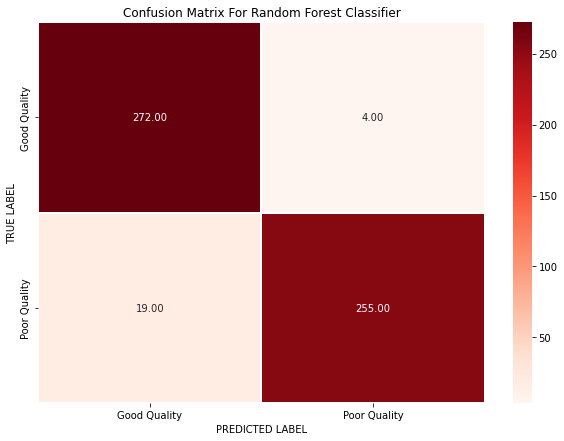

In [63]:
cm = confusion_matrix(y_test,predrfc)

x_axis_labels=['Good Quality','Poor Quality']
y_axis_labels=['Good Quality','Poor Quality']

ax=plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True ,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Random Forest Classifier')
plt.show()

In [64]:
#ROC_AUC Score of Random Forest Classifier:

auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

0.9580820903416906


### 2)Gradient Boosting Classifier

In [65]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc= gbc.predict(x_train)

report = pd.DataFrame(classification_report(y_train, predgbc, output_dict = True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,predgbc)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,predgbc)}\n")


=======================Train Result===========================
Accuracy score:94.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.919687    0.962325      0.94     0.941006      0.941028
recall       0.964066    0.915984      0.94     0.940025      0.940000
f1-score     0.941353    0.938583      0.94     0.939968      0.939967
support    974.000000  976.000000      0.94  1950.000000   1950.000000
________________________________________________________________
 Confusion Matrix:
[[939  35]
 [ 82 894]]



In [66]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc= gbc.predict(x_test)

report = pd.DataFrame(classification_report(y_test, predgbc, output_dict = True))
print("\n=======================TEST Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,predgbc)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,predgbc)}\n")


=======================TEST Result===========================
Accuracy score:92.55%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.906574    0.946360  0.925455    0.926467      0.926395
recall       0.949275    0.901460  0.925455    0.925368      0.925455
f1-score     0.927434    0.923364  0.925455    0.925399      0.925406
support    276.000000  274.000000  0.925455  550.000000    550.000000
________________________________________________________________
 Confusion Matrix:
[[262  14]
 [ 27 247]]



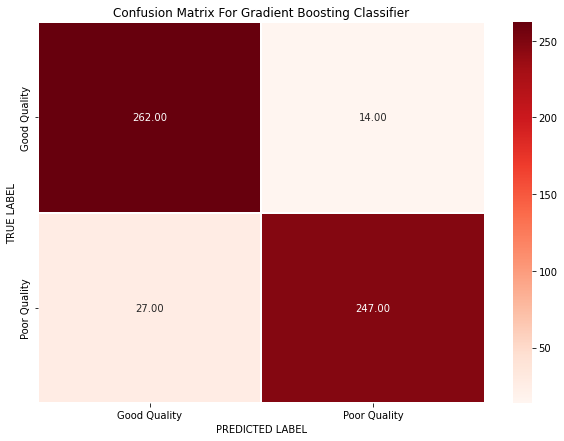

In [67]:
cm = confusion_matrix(y_test,predgbc)

x_axis_labels=['Good Quality','Poor Quality']
y_axis_labels=['Good Quality','Poor Quality']

ax=plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True ,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Gradient Boosting Classifier')
plt.show()

In [68]:
#ROC_AUC Score of Gradient Boosting Classifier:

auc_score=roc_auc_score(y_test,gbc.predict(x_test))
print(auc_score)

0.9253676081667196


### 3) K-Neighbors Classifier

In [69]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn= knn.predict(x_train)

report = pd.DataFrame(classification_report(y_train, predknn, output_dict = True))
print("\n=======================TRAIN Result===========================")
print(f"Accuracy score:{accuracy_score(y_train, predknn)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train, predknn)}\n")


=======================TRAIN Result===========================
Accuracy score:91.54%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.861483    0.987966  0.915385     0.924725      0.924790
recall       0.989733    0.841189  0.915385     0.915461      0.915385
f1-score     0.921166    0.908688  0.915385     0.914927      0.914921
support    974.000000  976.000000  0.915385  1950.000000   1950.000000
________________________________________________________________
 Confusion Matrix:
[[964  10]
 [155 821]]



In [70]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn= knn.predict(x_test)

report = pd.DataFrame(classification_report(y_test, predknn, output_dict = True))
print("\n=======================TEST Result===========================")
print(f"Accuracy score:{accuracy_score(y_test, predknn)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test, predknn)}\n")


=======================TEST Result===========================
Accuracy score:89.09%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.833333    0.973451  0.890909    0.903392      0.903138
recall       0.978261    0.802920  0.890909    0.890590      0.890909
f1-score     0.900000    0.880000  0.890909    0.890000      0.890036
support    276.000000  274.000000  0.890909  550.000000    550.000000
________________________________________________________________
 Confusion Matrix:
[[270   6]
 [ 54 220]]



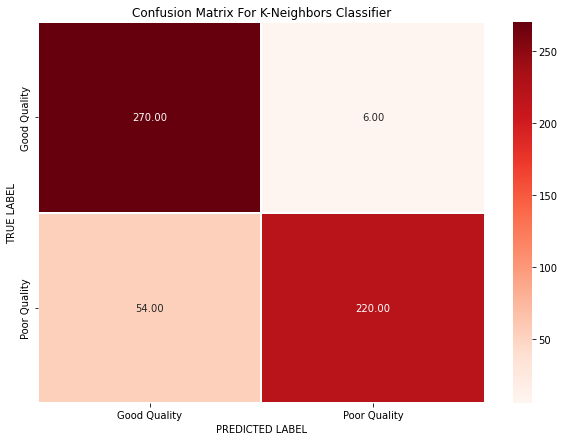

In [71]:
cm = confusion_matrix(y_test,predknn)

x_axis_labels=['Good Quality','Poor Quality']
y_axis_labels=['Good Quality','Poor Quality']

ax=plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True, linewidths=0.1, fmt='.2f', cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For K-Neighbors Classifier')

plt.show()

In [72]:
#ROC_AUC Score of KNeighbors Classifier:

auc_score=roc_auc_score(y_test,knn.predict(x_test))
print(auc_score)

0.8905902887972073


### 4)Decision Tree Classifier

In [73]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc= dtc.predict(x_train)

report = pd.DataFrame(classification_report(y_train, preddtc, output_dict = True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,preddtc)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,preddtc)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    974.0  976.0       1.0     1950.0        1950.0
________________________________________________________________
 Confusion Matrix:
[[974   0]
 [  0 976]]



In [74]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc= dtc.predict(x_test)

report = pd.DataFrame(classification_report(y_test, preddtc, output_dict = True))
print("\n=======================TEST Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,preddtc)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,preddtc)}\n")


=======================TEST Result===========================
Accuracy score:89.82%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy  macro avg  weighted avg
precision    0.898551    0.89781  0.898182    0.89818      0.898182
recall       0.898551    0.89781  0.898182    0.89818      0.898182
f1-score     0.898551    0.89781  0.898182    0.89818      0.898182
support    276.000000  274.00000  0.898182  550.00000    550.000000
________________________________________________________________
 Confusion Matrix:
[[248  28]
 [ 28 246]]



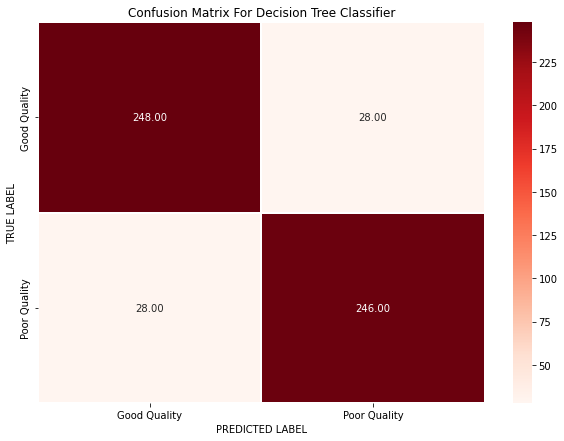

In [75]:
cm = confusion_matrix(y_test,preddtc)

x_axis_labels=['Good Quality','Poor Quality']
y_axis_labels=['Good Quality','Poor Quality']

ax=plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True, linewidths=0.1, fmt='.2f', cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Decision Tree Classifier')

plt.show()

In [76]:
#ROC_AUC Score of Decision Tree Classifier:

auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print(auc_score)

0.8981804718078916


### 5)Support Vector Classifier

In [77]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_train)

svcreport = pd.DataFrame(classification_report(y_train, predsvc , output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,predsvc)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svcreport}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,predsvc)}\n")


=======================Train Result===========================
Accuracy score:91.38%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.891262    0.939130  0.913846     0.915196      0.915221
recall       0.942505    0.885246  0.913846     0.913876      0.913846
f1-score     0.916168    0.911392  0.913846     0.913780      0.913778
support    974.000000  976.000000  0.913846  1950.000000   1950.000000
________________________________________________________________
 Confusion Matrix:
[[918  56]
 [112 864]]



In [78]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

svcreport = pd.DataFrame(classification_report(y_test, predsvc , output_dict=True))
print("\n=======================TEST Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,predsvc)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svcreport}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,predsvc)}\n")


=======================TEST Result===========================
Accuracy score:93.27%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.916376    0.950570  0.932727    0.933473      0.933411
recall       0.952899    0.912409  0.932727    0.932654      0.932727
f1-score     0.934281    0.931099  0.932727    0.932690      0.932695
support    276.000000  274.000000  0.932727  550.000000    550.000000
________________________________________________________________
 Confusion Matrix:
[[263  13]
 [ 24 250]]



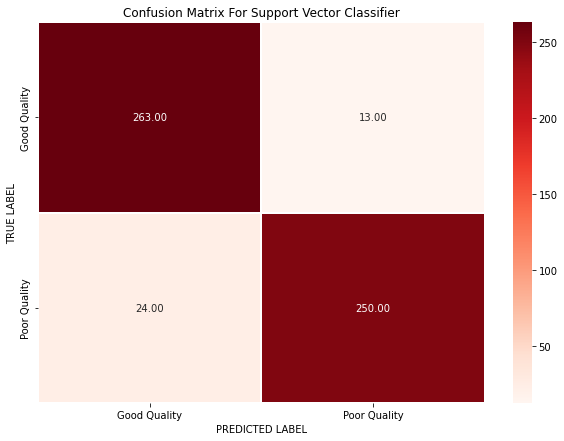

In [79]:
cm = confusion_matrix(y_test,predsvc)

x_axis_labels=['Good Quality','Poor Quality']
y_axis_labels=['Good Quality','Poor Quality']

ax=plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True, linewidths=0.1, fmt='.2f', cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Support Vector Classifier')

plt.show()

In [80]:
#ROC_AUC Score of Support Vector Classifier:

auc_score=roc_auc_score(y_test,svc.predict(x_test))
print(auc_score)

0.9326536549243627


#### Key Observations-

- The Test accuracy score of all the different models are -
    - 1)Random Forest Classifier - 96%
    - 2)Gradient Boosting Classifier - 92.55%
    - 3)K-Neighbors Classifier - 89.09%
    - 4)Decision Tree Classifier - 89.81%
    - 5)Support Vector Classifier - 93.26%
    
    - This shows Random Forest Classifier is best fit model with best accuracy score.

### PLOTTING ROC_AUC CURVE

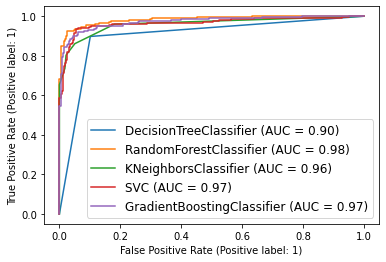

In [92]:

disp = plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':12},loc='lower right')
plt.show()

- The orange line with RandomForest Classifier gives the best result with AUC=0.99.

### CROSS-VALIDATION-
    - Cross-validation technique is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose.

In [82]:
#CV score of Random forest classifier-

print(f"CV Score of RF:{cross_val_score(rfc,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:90.68%


In [83]:
#CV Score of Gradient Boosting Classifier - 

print(f"CV score of GB:{cross_val_score(gbc,x,y,cv = 5).mean()*100:.2f}%")

CV score of GB:87.52%


In [84]:
#CV Score of K-Neighbors Classifier-

print(f"CV Score of KNN:{cross_val_score(knn,x,y,cv = 5).mean()*100:.2f}%")

CV Score of KNN:84.60%


In [85]:
#CV Score of Decision Tree Classifier - 

print(f"CV Score of DT:{cross_val_score(dtc,x,y,cv = 5).mean()*100:.2f}%")

CV Score of DT:87.24%


In [86]:
#CV Score of Support Vector Classifier - 

print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv = 5).mean()*100:.2f}%")

CV Score of SVC:73.12%


### HYPERPARAMETER TUNING-

In [87]:
rf = RandomForestClassifier()

params={'criterion':['gini','entropy'],
       'max_depth':[2,20],
       'min_samples_split':[10,11],
       'min_samples_leaf':[5,6],
        'n_estimators':[13,15],
        }

In [88]:
grid_search = GridSearchCV (rf,param_grid=params,cv=5)
grid_search.fit(x_train,y_train)

print("Best_Params:",grid_search.best_params_)

Best_Params: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13}


In [89]:
rfc =grid_search.best_estimator_ 
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rfc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat: ','\n',rfc_conf_mat)

print('Accuracy of Random Forest Classifier After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

con_mat:  
 [[268   8]
 [ 20 254]]
Accuracy of Random Forest Classifier After Hyperparameter Tuning==>  94.9090909090909


In [90]:
# classification report
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       276
           1       0.97      0.93      0.95       274

    accuracy                           0.95       550
   macro avg       0.95      0.95      0.95       550
weighted avg       0.95      0.95      0.95       550



### SAVING THE MODEL-

In [91]:
import joblib

joblib.dump(rfc,'redWineQualityprediction_file.obj')

['redWineQualityprediction_file.obj']

#### *********COMPLETED**********